
## Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### Renaming and Calling the dataset as dataframe


In [2]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

- The dataframe has 7043 rows and 21 columns.

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- The dataset has 18 columns as object , 2 columns as integer data types and 1 column as float data type.

In [5]:
df.columns # all the columns of the dataset.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

- There are no duplicated values.

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no null-values in the dataset.

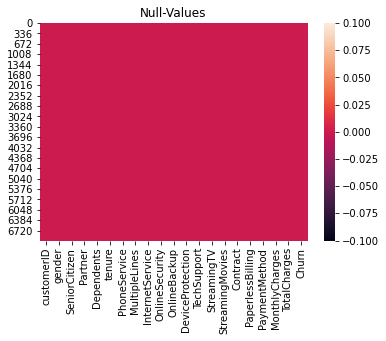

In [8]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- There are no null-values in the heatmap.

In [9]:
df.describe() # numerical data only

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Checking the values of the unique values of the columns :-


In [10]:
category_col=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']
for c in category_col:
    print(c)
    print(df[c].value_counts())

customerID
2957-JIRMN    1
9154-QDGTH    1
8402-EIVQS    1
7912-SYRQT    1
5919-VCZYM    1
             ..
9139-TWBAS    1
9821-BESNZ    1
1926-QUZNN    1
8972-HJWNV    1
6647-ZEDXT    1
Name: customerID, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DevicePro

- There are no mis-interpreted values in the dataset.

### Visualisation of Categorical columns :-

In [11]:
df_categorical=df[['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']].copy()
df_categorical

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


Male      3555
Female    3488
Name: gender, dtype: int64


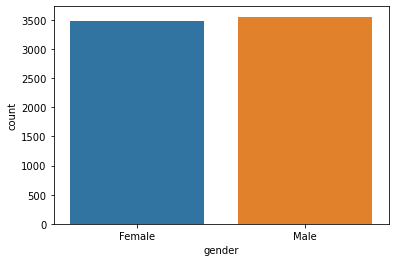

In [12]:
ax=sns.countplot(x='gender',data=df_categorical)
print(df_categorical['gender'].value_counts())

- number of feamls and males in the record is almost equal.

No     3641
Yes    3402
Name: Partner, dtype: int64


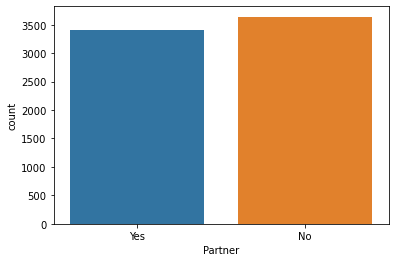

In [13]:
ax=sns.countplot(x='Partner',data=df_categorical)
print(df_categorical['Partner'].value_counts())

- The column 'Partner' is in balance with bot Yes and No values almost in equal number.

No     4933
Yes    2110
Name: Dependents, dtype: int64


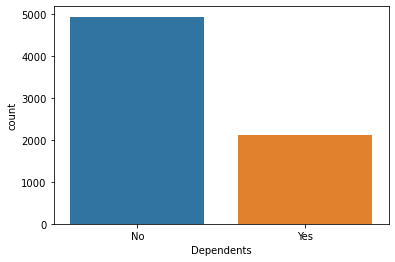

In [14]:
ax=sns.countplot(x='Dependents',data=df_categorical)
print(df_categorical['Dependents'].value_counts())

- The graph shows that more than half of the people in the record are independent.

Yes    6361
No      682
Name: PhoneService, dtype: int64


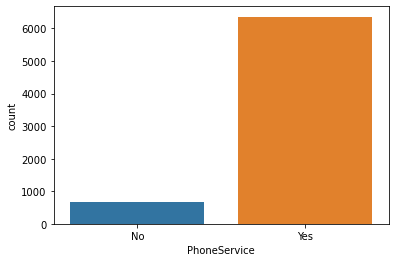

In [15]:
ax=sns.countplot(x='PhoneService',data=df_categorical)
print(df_categorical['PhoneService'].value_counts())

- About 10 % of people have not availed PhoneService , rest have.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


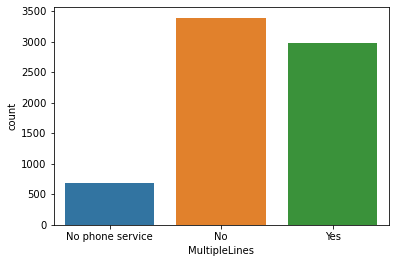

In [16]:
ax=sns.countplot(x='MultipleLines',data=df_categorical)
print(df_categorical['MultipleLines'].value_counts())

- The graph shows around 43 % people have not taken MultipleLines.
- Around 38 % people have taken MultipleLines.
- Around 8 % of people of the record have no phone services at all.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


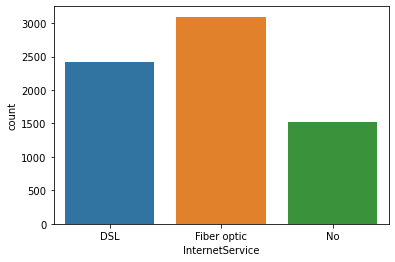

In [17]:
ax=sns.countplot(x='InternetService',data=df_categorical)
print(df_categorical['InternetService'].value_counts())

- The graph shows around 43 % people have Fiber Optic Internet Service.
- Around 34 % people have DSL Internet Service.
- Around 21 % of people of the record have no Internet services at all.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


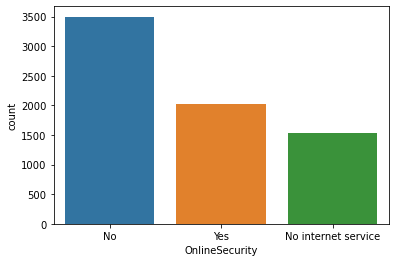

In [18]:
ax=sns.countplot(x='OnlineSecurity',data=df_categorical)
print(df_categorical['OnlineSecurity'].value_counts())

- The graph shows around 43 % people don't have online security.
- Around 34 % people have online Service.
- Around 21 % of people of the record have no Internet services at all.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


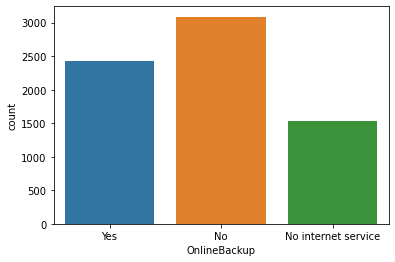

In [19]:
ax=sns.countplot(x='OnlineBackup',data=df_categorical)
print(df_categorical['OnlineBackup'].value_counts())

- The graph shows around 40 % people don't have online backup.
- Around 38 % people have online backup.
- Around 24 % of people of the record have no Internet services at all.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


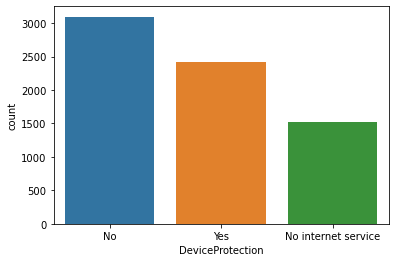

In [20]:
ax=sns.countplot(x='DeviceProtection',data=df_categorical)
print(df_categorical['DeviceProtection'].value_counts())

- The graph shows around 43 % people don't have device protection.
- Around 38 % people have online protection.
- Around 24 % of people of the record have no Internet services at all.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


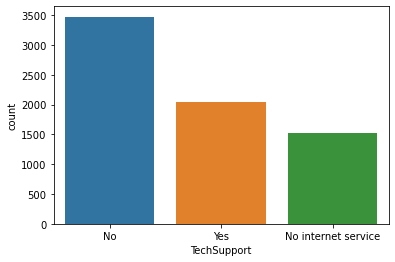

In [21]:
ax=sns.countplot(x='TechSupport',data=df_categorical)
print(df_categorical['TechSupport'].value_counts())

- The graph shows around 45 % people don't have any tech support.
- Around 32 % people have tech support.
- Around 21 % of people of the record have no Internet services at all.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


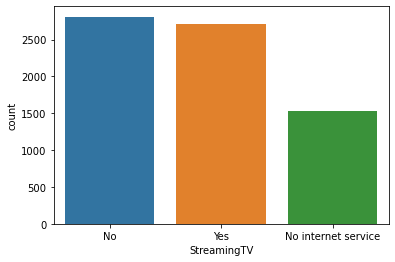

In [22]:
ax=sns.countplot(x='StreamingTV',data=df_categorical)
print(df_categorical['StreamingTV'].value_counts())

- The graph shows around 39 % people don't have Streaming TV.
- Around 36 % people have Streaming TV.
- Around 24 % of people of the record have no Internet services at all.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


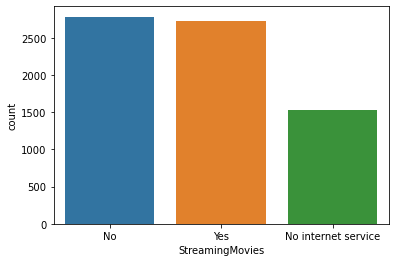

In [23]:
ax=sns.countplot(x='StreamingMovies',data=df_categorical)
print(df_categorical['StreamingMovies'].value_counts())

- The graph shows around 43 % people don't have Streaming movies.
- Around 35 % people have Streaming movies.
- Around 24 % of people of the record have no Internet services at all.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


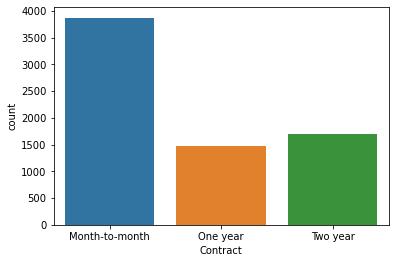

In [24]:
ax=sns.countplot(x='Contract',data=df_categorical)
print(df_categorical['Contract'].value_counts())

- The graph shows around 48 % people have Mont-to-Month Contract.
- Around 21 % people have One-year contract.
- Around 26 % of people have two-year contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


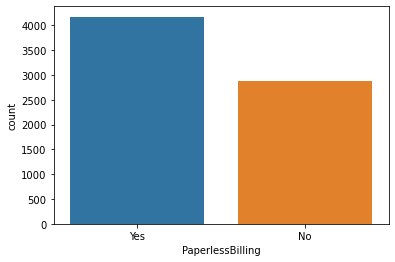

In [25]:
ax=sns.countplot(x='PaperlessBilling',data=df_categorical)
print(df_categorical['PaperlessBilling'].value_counts())

- The graph shows around 48 % people have Paperless billing.
- Around 42 % people don't have paperless billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


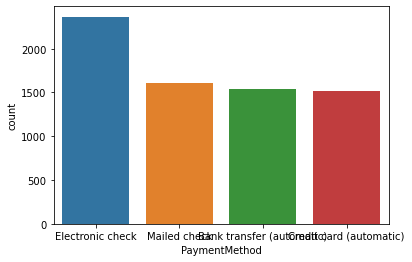

In [26]:
ax=sns.countplot(x='PaymentMethod',data=df_categorical)
print(df_categorical['PaymentMethod'].value_counts())

- The graph shows around 33 % people have Electronic check as payment method.
- Around 22 % people have Mailed check as payment method.
- Around 19 % of people have bank transfer method of payment.
- Around 18 % of people have Credit card as payment method.

No     5174
Yes    1869
Name: Churn, dtype: int64


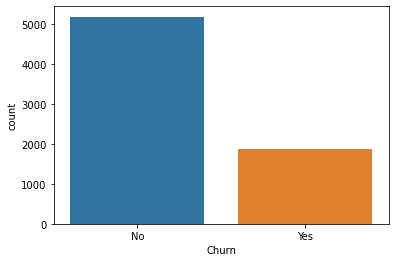

In [27]:
ax=sns.countplot(x='Churn',data=df_categorical)
print(df_categorical['Churn'].value_counts())

- The graph shows that more than half of the people from the record are not having churn while some are.
- Target variable imbalanced.

##  Numeric data containing variables of the dataset :-

In [28]:
df_numerical=df[['SeniorCitizen','tenure','MonthlyCharges']].copy()
df_numerical

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

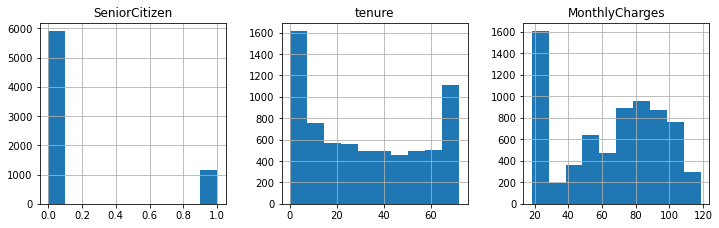

In [29]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

SeniorCitizen        AxesSubplot(0.125,0.657941;0.227941x0.222059)
tenure            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
MonthlyCharges    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

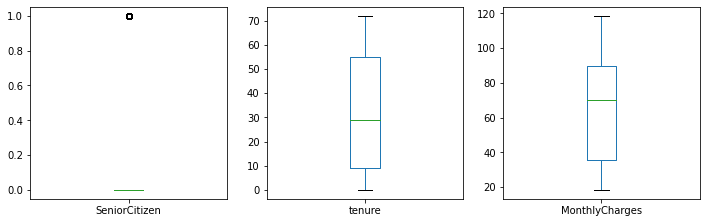

In [30]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

- Not much outliers can be observed in the graphs.

<AxesSubplot:>

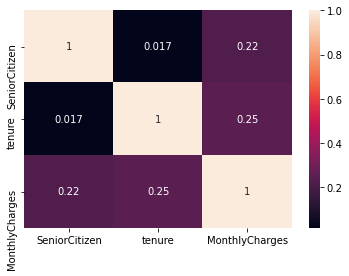

In [31]:
sns.heatmap(df.corr(),annot=True)

- Most of the columns are categorical so this heatmap is not showing much correlation.

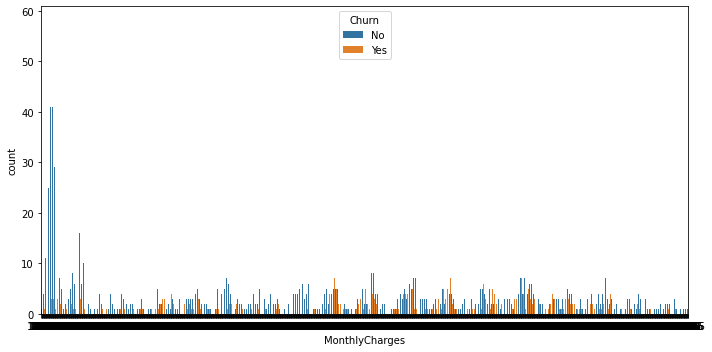

In [32]:
fig = plt.figure(figsize=(10,5))
sns.countplot('MonthlyCharges', hue='Churn', data=df)
plt.tight_layout()
plt.show()

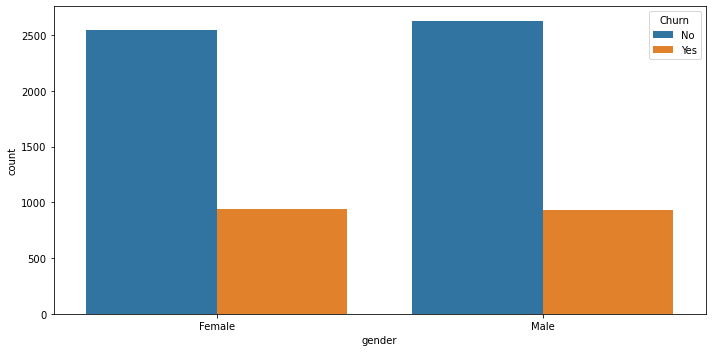

In [33]:
fig = plt.figure(figsize=(10,5))
sns.countplot('gender', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- The no of females and males facing churn is almost similar.

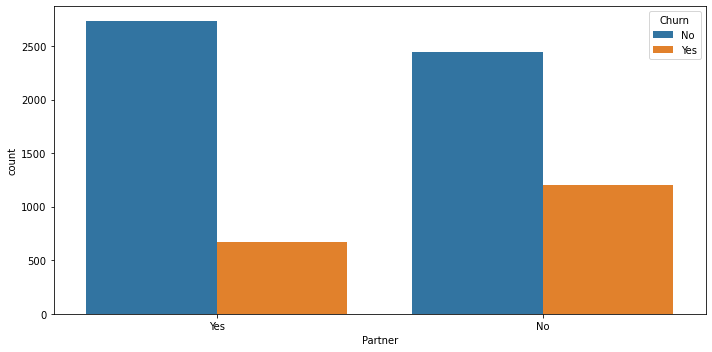

In [34]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Partner', hue='Churn', data=df)
plt.tight_layout()
plt.show()

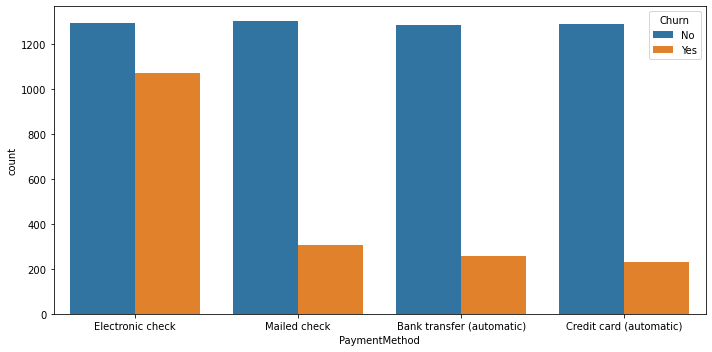

In [35]:
fig = plt.figure(figsize=(10,5))
sns.countplot('PaymentMethod', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who have used Eclectronic Check as payment method had most Churn than that of others.
- People who have used Credit Card as payment method had least Churn than that of others.

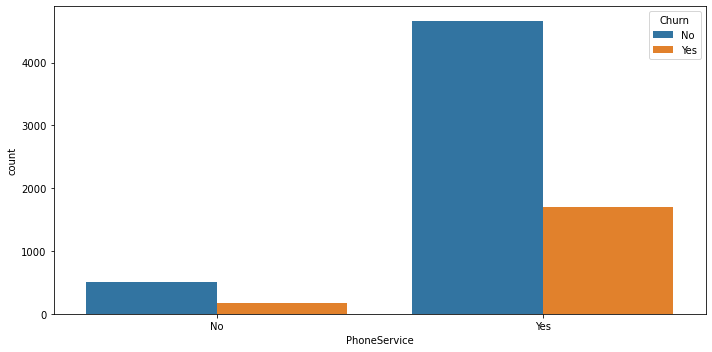

In [36]:
fig = plt.figure(figsize=(10,5))
sns.countplot('PhoneService', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who have PhoneService had most Churn than that of who did't have any phone service.

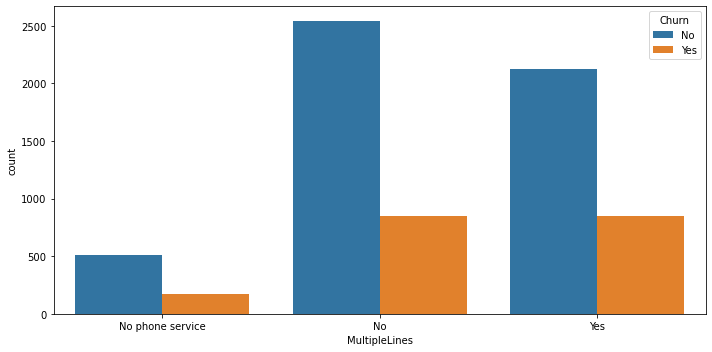

In [37]:
fig = plt.figure(figsize=(10,5))
sns.countplot('MultipleLines', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who have MultipleLines had more Churn than that of who don't have multiplelines.

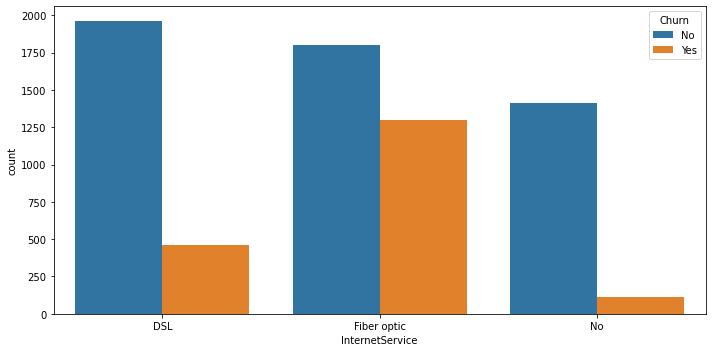

In [38]:
fig = plt.figure(figsize=(10,5))
sns.countplot('InternetService', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who have Fibre Optic Internet service had more Churn than that of DSL.

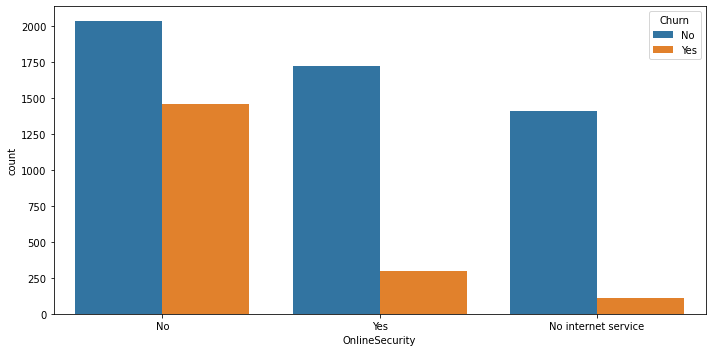

In [39]:
fig = plt.figure(figsize=(10,5))
sns.countplot('OnlineSecurity', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who don't have online security have more churn than that of who don't have online security.

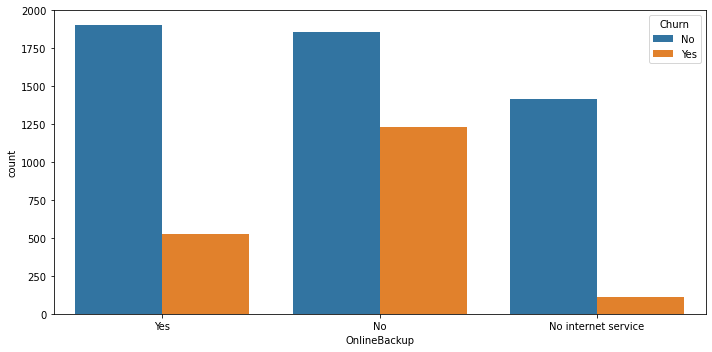

In [40]:
fig = plt.figure(figsize=(10,5))
sns.countplot('OnlineBackup', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who don't have online backup have more churn than that of who don't have online backup.

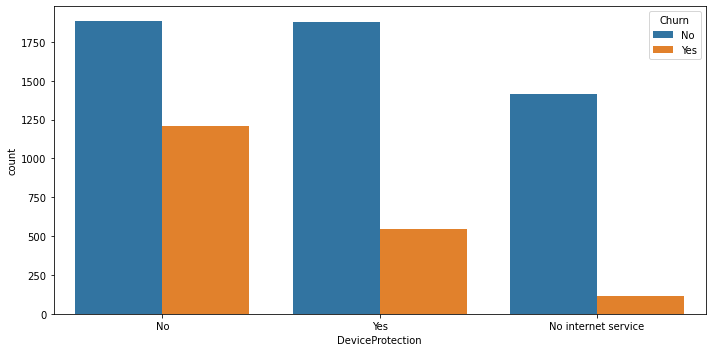

In [41]:
fig = plt.figure(figsize=(10,5))
sns.countplot('DeviceProtection', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who have device protection have more churn than that of who don't have device protection.

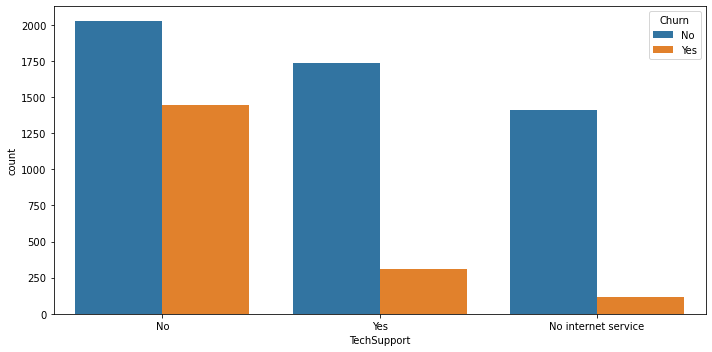

In [42]:
fig = plt.figure(figsize=(10,5))
sns.countplot('TechSupport', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who don't have tech support have more churn than that of who don't have tech support .

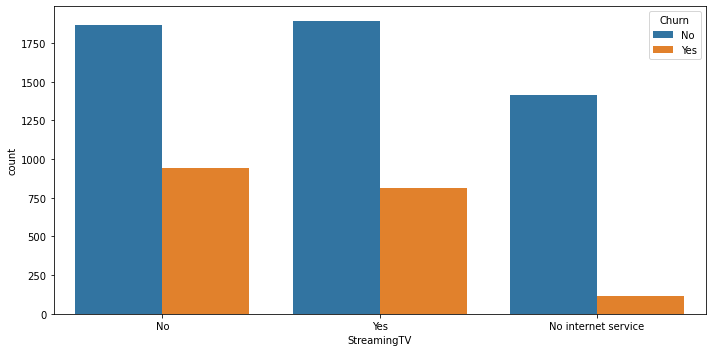

In [43]:
fig = plt.figure(figsize=(10,5))
sns.countplot('StreamingTV', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who don't have streaming tv have more churn than that of who don't have streaming tv.

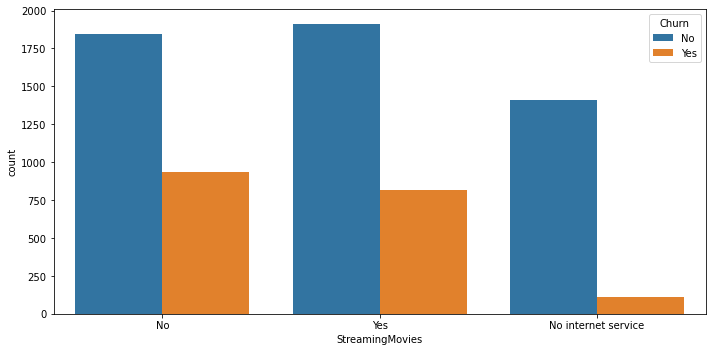

In [44]:
fig = plt.figure(figsize=(10,5))
sns.countplot('StreamingMovies', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who don't have streaming movies have more churn than that of who don't have streaming movies.

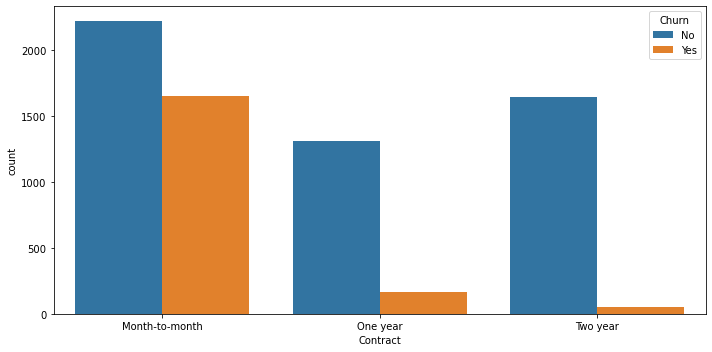

In [45]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Contract', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People who have Month-Month contract have most churn.
- People who have two-year contract have least churn.

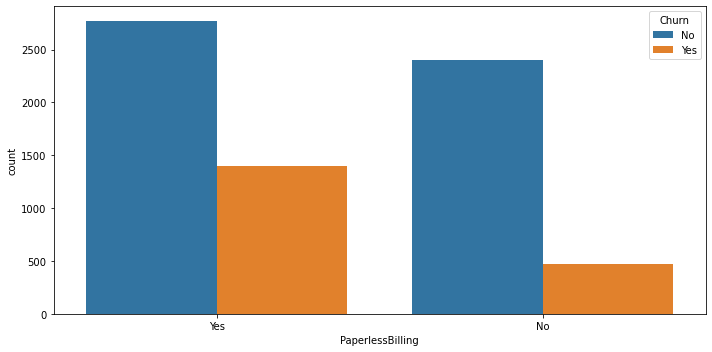

In [46]:
fig = plt.figure(figsize=(10,5))
sns.countplot('PaperlessBilling', hue='Churn', data=df)
plt.tight_layout()
plt.show()

- People with paperless billing have more churn than who don't have paperless billing.

## Multi-Variate analysis : -

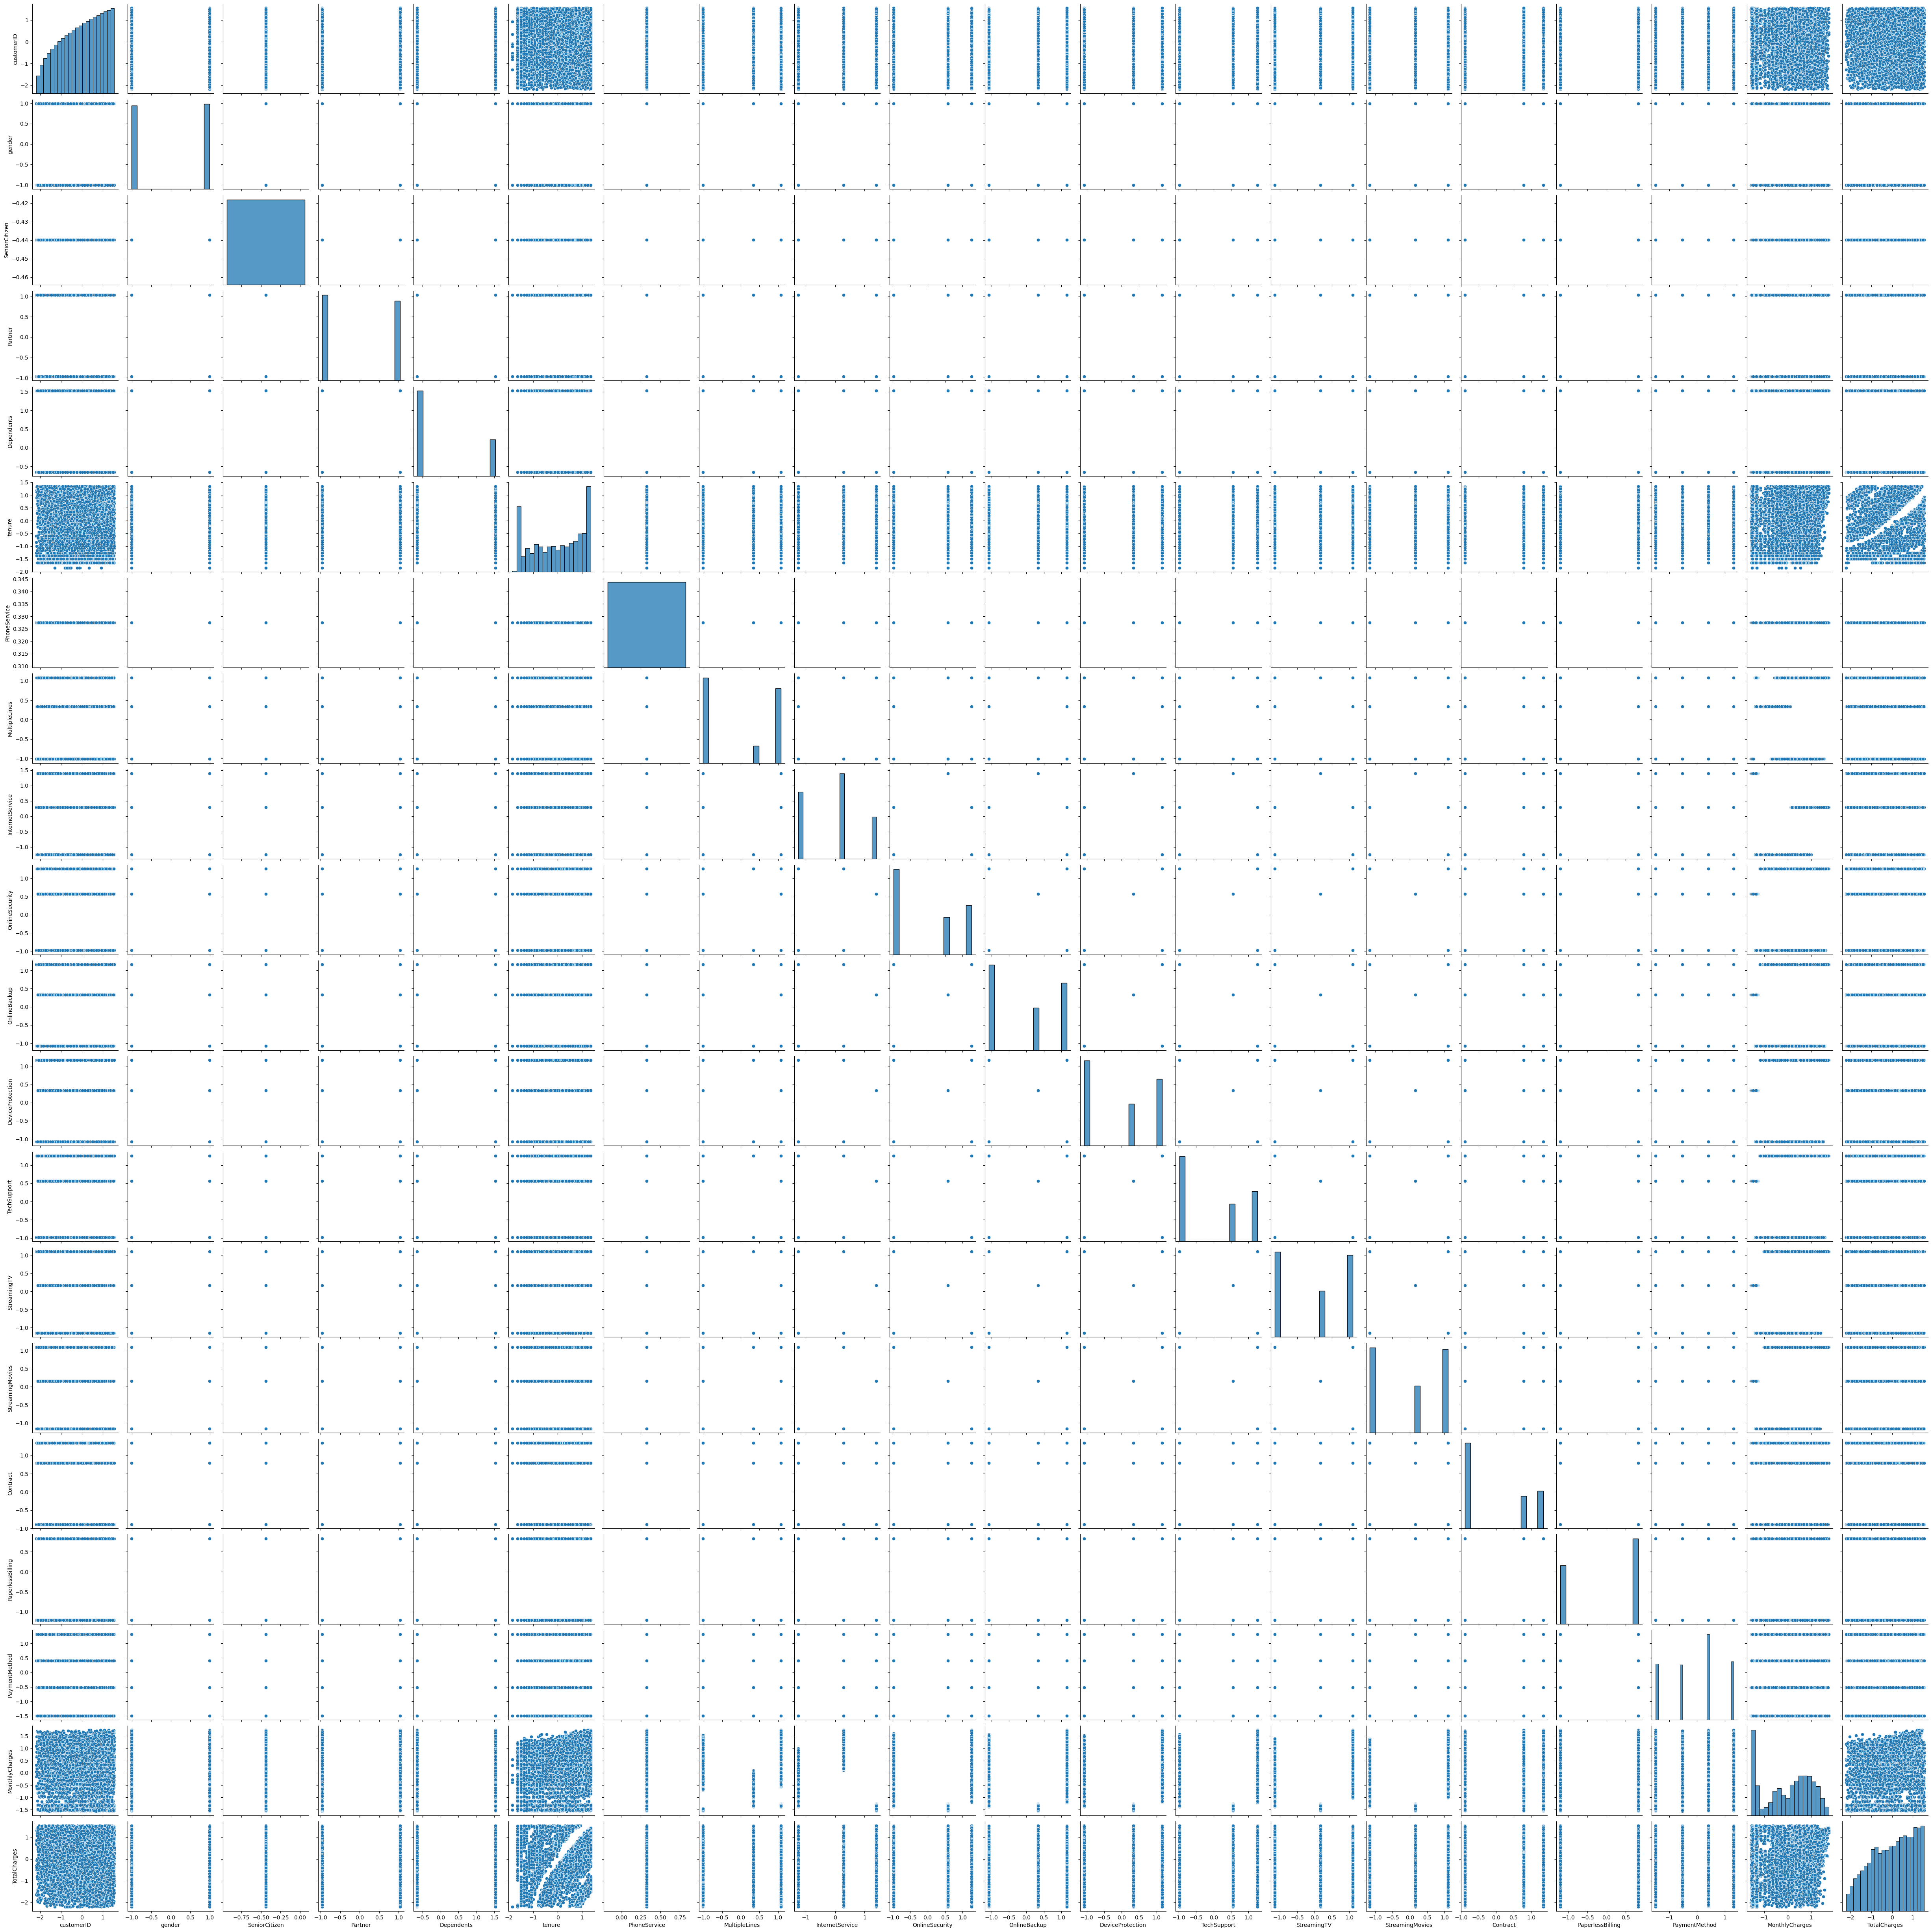

In [91]:
 # Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

## Encoding the DataFrame :


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [50]:
for col in df.columns:
    if df[col].dtypes== 'object':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


### Sepearating target variable : -

In [51]:
x = df.drop('Churn', axis=1)
y = df['Churn']

### Checking the skewness

In [52]:
df.skew()  #keeping +/- 0.5 as the range for skeness.

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

### Handling the skewness



In [53]:
from sklearn.preprocessing import power_transform
df=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)
df.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

### Handling the outliers :-

In [54]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

## Scaling 

In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
x=mms.fit_transform(x)
from sklearn.metrics import f1_score
x

array([[0.76327748, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.38361409],
       [0.56262425, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.2245023 ],
       [0.36410111, 1.        , 0.        , ..., 1.        , 0.35422886,
        0.02404288],
       ...,
       [0.47813121, 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.45849923],
       [0.84265834, 1.        , 1.        , ..., 1.        , 0.55870647,
        0.40735069],
       [0.31610338, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.8280245 ]])

## Checking & handling class-imbalance in target variable :-

In [56]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    73.46 %
1    26.54 %
Name: Churn, dtype: object

In [57]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [58]:
ros = RandomOverSampler(random_state=42)

In [59]:
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [60]:
x_resampled,y_resampled=ros.fit_resample(x,y)

In [61]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 99


In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=99,stratify=y)
print('length of X_train and x_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5634 1409
length of y_train and y_test:  5634 1409


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=99)

## Logistic regression¶


In [64]:
from sklearn.linear_model import LogisticRegression
ln= LogisticRegression(random_state=99)
ln.fit(x_train,y_train)
y_pred_ln=ln.predict(x_test)

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ln) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ln) * 100, 2))

Logistic Regression:
Accuracy score: 75.27
F1 score: 76.27


## Random Forest Classifier Model :-

In [65]:
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier(random_state=42)
rdf.fit(x_train,y_train)
y_pred_rdf=rdf.predict(x_test)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rdf) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rdf) * 100, 2))



Random Forest Classifier:
Accuracy score: 89.76
F1 score: 90.42


## Decision Tree Classifier model testing -



In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[1018    0]
 [   0 1052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1018
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070



## Nearest Neighbors Classifier model testing -

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

0.7526570048309179
[[746 272]
 [240 812]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1018
           1       0.75      0.77      0.76      1052

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



In [68]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [69]:
kneighbors(3)

0.7816425120772947
[[691 327]
 [125 927]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1018
           1       0.74      0.88      0.80      1052

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



In [70]:
kneighbors(4)

0.7526570048309179
[[746 272]
 [240 812]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1018
           1       0.75      0.77      0.76      1052

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



In [71]:
kneighbors(5)

0.7483091787439613
[[666 352]
 [169 883]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1018
           1       0.71      0.84      0.77      1052

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



In [72]:
kneighbors(6)

0.7410628019323672
[[740 278]
 [258 794]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1018
           1       0.74      0.75      0.75      1052

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



## Cross-Validation score for each model :-

In [92]:
from sklearn.model_selection import cross_val_score

In [94]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for LogisticRegression model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :74.54332075859732.')

The cross validation score for LogisticRegression model is : 0.7263943439899349
The difference between accuracy and crossvalidation score is :74.54332075859732.


In [96]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.2736055551971095.')

The cross validation score for DecisionTreeClassifier model is : 0.7258275735531324
The difference between accuracy and crossvalidation score is :0.2736055551971095.


In [98]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for kneighbors model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.027824959215071776.')

The cross validation score for kneighbors model is : 0.7248328521194916
The difference between accuracy and crossvalidation score is :0.027824959215071776.


## Hyperparameter Tuning¶



In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [79]:
param_dist = {'n_estimators': n_estimators,'max_depth': max_depth,}

In [80]:
rf_tuned = RandomForestClassifier(random_state=99)

In [81]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=99)

In [82]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=99)

In [83]:
rf_cv.best_score_

0.882096049155684

In [84]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 87}

In [85]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=99)

In [86]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=99)

In [87]:
y_pred_rf_best = rf_best.predict(x_test)

In [88]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.52
F1 score: 90.11


## Saving the model¶

In [99]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtc,open('pickledtcfile','wb'))

In [101]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([1, 1, 1, ..., 0, 1, 0])